In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../src")

from agents import make_agents
from pdg_env import PDGGridParallelEnv
from loop_pz import run_simulation
from analysis_PDG import coop_timecourse_mean_sd, cc_mcc, alpha_fit_polyfit

In [ ]:
SEED = 123
rng = np.random.default_rng(SEED)

# PDG setup
grid_size = 10
n_agents = grid_size * grid_size
ep_length = 100
n_episodes = 500

# BM params
A0 = 0.5
beta = 0.2
epsilon = 0.2
p_init = 0.5

# Aspiration dynamique
eta_list = [0.0, 0.01, 0.05, 0.1]

In [ ]:
def run_experiment(eta, seed = 0):
    env = PDGGridParallelEnv(size=grid_size, ep_leng=ep_length)

    agents = make_agents(
        n_agents=n_agents,
        A=A0,
        beta=beta,
        epsilon=epsilon,
        p_init=p_init,
        eta=eta
    )

    actions, rewards, p, A = run_simulation(
        env=env,
        agents=agents,
        n_episodes=n_episodes,
        ep_lenght_max=ep_length,
        seed=seed
    )

    return actions, rewards, p, A

In [ ]:
results = {}

for eta in eta_list:
    print(f"Running eta = {eta}")
    results[eta] = run_experiment(eta, seed = SEED)

Running eta = 0.0
Running eta = 0.01
Running eta = 0.05
Running eta = 0.1


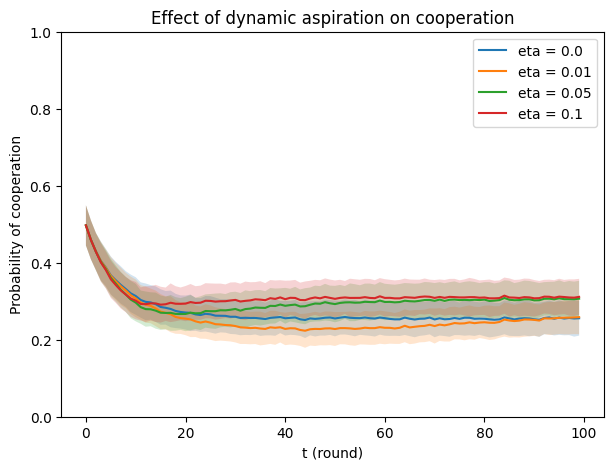

In [35]:
plt.figure(figsize=(7,5))

for eta in eta_list:
    actions = results[eta][0]
    mean, std = coop_timecourse_mean_sd(actions)

    plt.plot(mean, label=f"eta = {eta}")
    plt.fill_between(
        range(len(mean)),
        mean - std,
        mean + std,
        alpha=0.2
    )

plt.xlabel("t (round)")
plt.ylim(0, 1)
plt.ylabel("Probability of cooperation")
plt.legend()
plt.title("Effect of dynamic aspiration on cooperation")
plt.show()


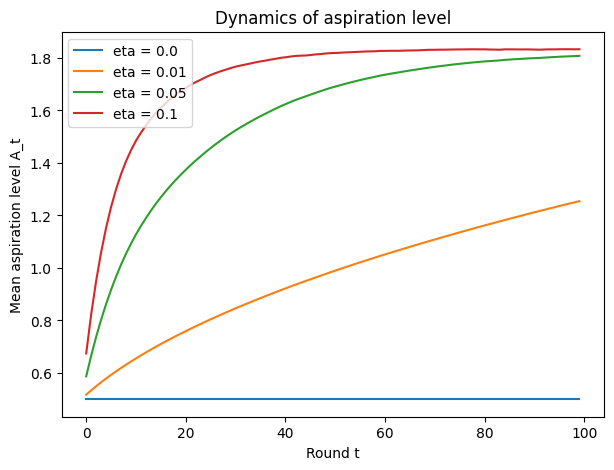

In [ ]:
plt.figure(figsize=(7,5))

for eta in eta_list:
    A = results[eta][3]
    A_mean = A.mean(axis=(0,2))
    plt.plot(A_mean, label=f"eta = {eta}")

plt.xlabel("Round t")
plt.ylabel("Mean aspiration level A_t")
plt.legend()
plt.title("Dynamics of aspiration level")
plt.show()

100 4


<Figure size 1500x400 with 0 Axes>

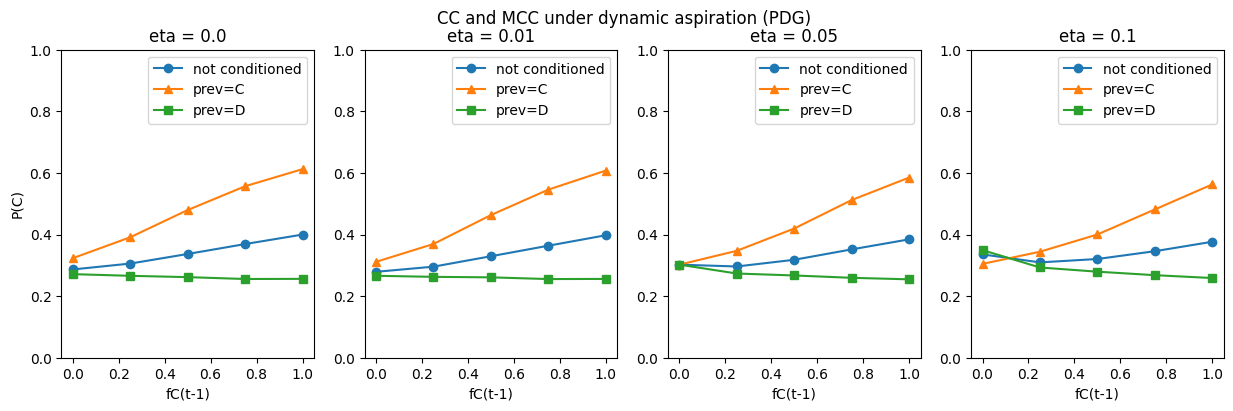

In [39]:
plt.figure(figsize=(15,4))

env = PDGGridParallelEnv(size=grid_size, ep_leng=ep_length)
neighbors = env.neighbors
print(len(neighbors), len(neighbors[0]))


plt.figure(figsize=(15,4))

for i, eta in enumerate(eta_list):
    actions = results[eta][0]

    out = cc_mcc(actions, neighbors)
    fC_vals = out["f_vals"]
    pC = out["pC"]
    pC_C = out["pC_C"]
    pC_D = out["pC_D"]

    plt.subplot(1, len(eta_list), i+1)
    plt.plot(fC_vals, pC, "o-", label="not conditioned")
    plt.plot(fC_vals, pC_C, "^-", label="prev=C")
    plt.plot(fC_vals, pC_D, "s-", label="prev=D")

    plt.title(f"eta = {eta}")
    plt.xlabel("fC(t-1)")
    if i == 0:
        plt.ylabel("P(C)")
    plt.ylim(0, 1)
    plt.legend()

plt.suptitle("CC and MCC under dynamic aspiration (PDG)")
plt.show()



In [38]:
for eta in eta_list:
    actions = results[eta][0]
    alpha = alpha_fit_polyfit(actions, neighbors)

    print(f"eta = {eta}")
    print(alpha)


eta = 0.0
(0.11089028355952438, 0.28172132826785307, 1200000)
eta = 0.01
(0.11428234407924247, 0.2724534810260188, 1200000)
eta = 0.05
(0.06449645008092382, 0.28936415819314115, 1200000)
eta = 0.1
(0.01623927043110356, 0.3174009247032631, 1200000)
